##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
import os
import pickle
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.summary()

--2021-06-02 15:20:53--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.183.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   125MB/s    in 0.7s    

2021-06-02 15:20:54 (125 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                   

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False


last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
##Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Bangkit_Capstone/dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Define our example directories and files
base_dir = '/tmp/dataset'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_human_dir = os.path.join(train_dir, 'person') # Directory with our training human pictures
train_no_human_dir = os.path.join(train_dir, 'no person') # Directory with our training no human pictures
validation_human_dir = os.path.join(validation_dir, 'person') # Directory with our validation human pictures
validation_no_human_dir = os.path.join(validation_dir, 'no person')# Directory with our validation no human pictures

train_human_fnames = os.listdir(train_human_dir)
train_no_human_fnames = os.listdir(train_no_human_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (256, 256))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (256, 256))

Found 1912 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            # steps_per_epoch = 100,
            epochs = 20,
            # validation_steps = 50,
            verbose = 2)

Epoch 1/20
96/96 - 85s - loss: 0.6487 - accuracy: 0.8065 - val_loss: 0.2774 - val_accuracy: 0.8859
Epoch 2/20
96/96 - 51s - loss: 0.4486 - accuracy: 0.8551 - val_loss: 0.2688 - val_accuracy: 0.8838
Epoch 3/20
96/96 - 51s - loss: 0.3705 - accuracy: 0.8698 - val_loss: 0.1835 - val_accuracy: 0.9461
Epoch 4/20
96/96 - 51s - loss: 0.3693 - accuracy: 0.8823 - val_loss: 0.2034 - val_accuracy: 0.9336
Epoch 5/20
96/96 - 51s - loss: 0.3506 - accuracy: 0.8844 - val_loss: 0.2486 - val_accuracy: 0.8900
Epoch 6/20
96/96 - 51s - loss: 0.3309 - accuracy: 0.8876 - val_loss: 0.2194 - val_accuracy: 0.9108
Epoch 7/20
96/96 - 50s - loss: 0.3193 - accuracy: 0.8996 - val_loss: 0.1797 - val_accuracy: 0.9336
Epoch 8/20
96/96 - 50s - loss: 0.3471 - accuracy: 0.8985 - val_loss: 0.2247 - val_accuracy: 0.9398
Epoch 9/20
96/96 - 51s - loss: 0.2980 - accuracy: 0.9001 - val_loss: 0.1524 - val_accuracy: 0.9481
Epoch 10/20
96/96 - 50s - loss: 0.2975 - accuracy: 0.9043 - val_loss: 0.1727 - val_accuracy: 0.9191
Epoch 11/

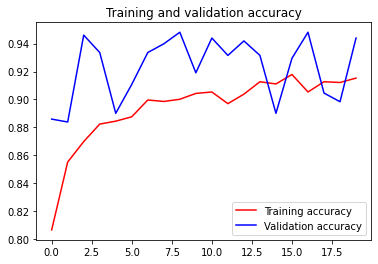

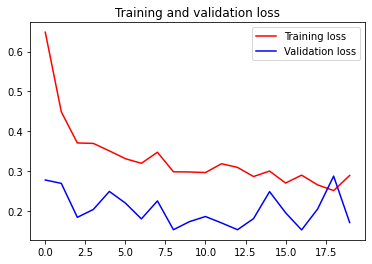

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot the accuracy of the model
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#Test with images
from keras_preprocessing import image
import numpy as np
import cv2

path_picture = os.path.join(validation_human_dir, 'frame_774.jpg')

img = cv2.imread(path_picture)
img = cv2.resize(img, (256, 256)).astype("float32")
x = np.expand_dims(img, axis = 0)
x = x/255.0

preds = model.predict(x)
print(preds[0][0])

0.66365546


In [ ]:
##SAVE THE MODEL, BIG FILE AHEAD BE CAREFUL
model.save('/content/drive/MyDrive/Bangkit_Capstone/colab/cctv_detection.h5')

In [ ]:
import os
os.chdir('/')
os.getcwd()

'/'

In [ ]:
pwd

'/'

In [ ]:
cd "tmp"

/tmp


In [ ]:
#Test with videos
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

VIDEO_NAME = '/tmp/dataset/tess.mp4'
video = cv2.VideoCapture(VIDEO_NAME)
# OUTPUT_VIDEO_NAME = '/tmp/output.mp4'
#Read per frame
result = []
while True:
  video.set(cv2.CAP_PROP_POS_MSEC,(3000))
  check,frame = video.read()
  
  if not check:
    break
  (H, W) = frame.shape[:2]
  output = frame.copy()
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  frame = cv2.resize(frame, (256, 256)).astype("float32")
  frame = frame/255.0
  processed = np.expand_dims(frame, axis = 0)
  prediction = model.predict(processed)[0][0]
  # print(prediction)
  if prediction < 0.5 :
    text = 'tidak ada orang, confidence level: {}'.format(prediction)
  else:
    text = 'ada orang , confidence level: {}'.format(1 - prediction)
  print(text)

  cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 5)
  # fourcc = cv2.VideoWriter_fourcc(*'H264')
  # # print(text)
  # writer = cv2.VideoWriter(OUTPUT_VIDEO_NAME,fourcc, 30, (W,H), True)
  
  if prediction > 0.5 : #Simpan yang terdeteksi sebagai manusia
    print(prediction)
    result.append(output)
  # writer.write(output)
  # cv2_imshow(output)
# writer.release()
video.release()

NameError: ignored

In [ ]:
len(result)

NameError: ignored

In [ ]:
print(check)

False


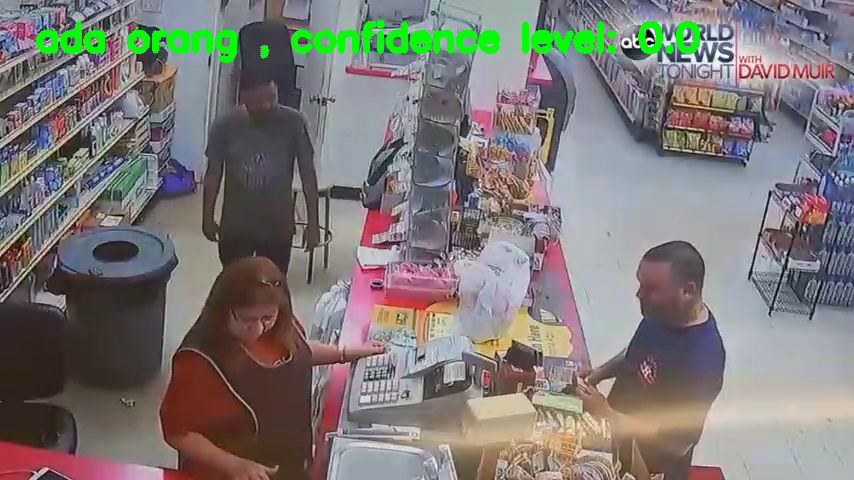

In [ ]:
cv2_imshow(result[14])